In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [2]:



#Vettori




In [3]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

In [4]:
#Importo i vettori
dataV = pd.read_csv('./vectors.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})
dataV.name.unique(), dataV.module.unique()

(array([nan, 'queueLength:vector', 'lifeTime:vector'], dtype=object),
 array([nan, 'Network.first', 'Network.second', 'Network.sink',
        'Network.sink1'], dtype=object))

In [5]:
def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt) / t[1:]

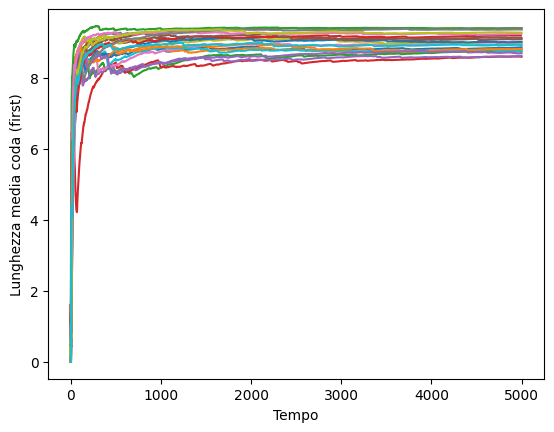

In [6]:
vec = dataV[(dataV.type=='vector') &(dataV.module == 'Network.first') & (dataV.name == 'queueLength:vector')]
for row in vec.itertuples():
    plt.plot(row.vectime[1:], running_timeavg(row.vectime,row.vecvalue))

plt.xlabel("Tempo")
plt.ylabel("Lunghezza media coda (first)")
#plt.vlines(x=100, ymin=0, ymax=10,color='r', linestyle='-')
plt.savefig("QueueLength_1.png")
plt.show()

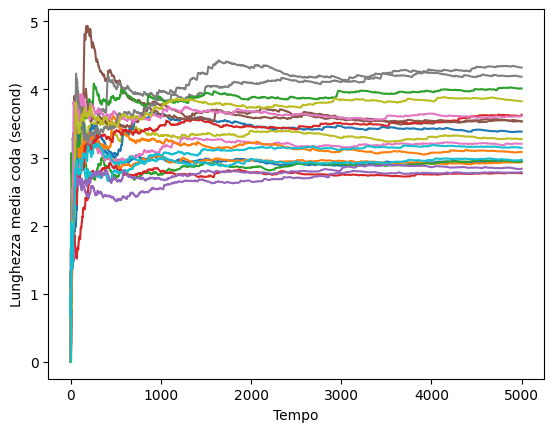

In [7]:
vec = dataV[(dataV.type=='vector') &(dataV.module == 'Network.second') & (dataV.name == 'queueLength:vector')]
for row in vec.itertuples():
    plt.plot(row.vectime[1:], running_timeavg(row.vectime,row.vecvalue))

plt.xlabel("Tempo")
plt.ylabel("Lunghezza media coda (second)")
#plt.vlines(x=100, ymin=0, ymax=2000,color='r', linestyle='-')
plt.savefig("QueueLength_2.png")
plt.show()

In [8]:
#lifetime of arrived jobs

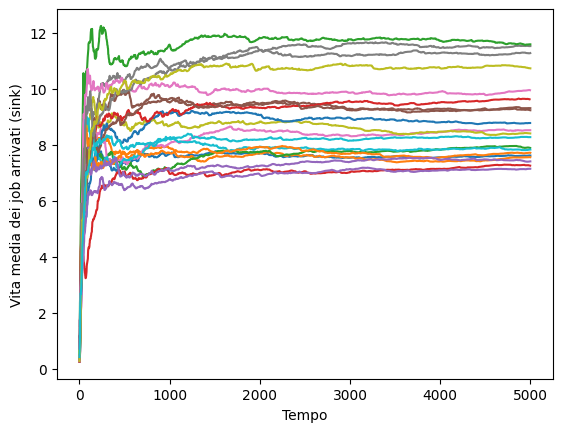

In [9]:
vec = dataV[(dataV.type=='vector') &(dataV.module == 'Network.sink') & (dataV.name == 'lifeTime:vector')]
for row in vec.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
    
plt.xlabel("Tempo")
plt.ylabel("Vita media dei job arrivati (sink)")
#plt.vlines(x=100, ymin=0, ymax=600,color='r', linestyle='-')
plt.savefig("VitaMedia_1.png")

plt.show()

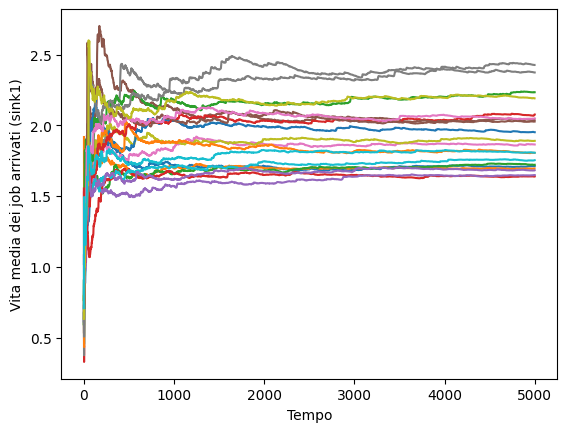

In [10]:
vec = dataV[(dataV.type=='vector') &(dataV.module == 'Network.sink1') & (dataV.name == 'lifeTime:vector')]
for row in vec.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
    
plt.xlabel("Tempo")
plt.ylabel("Vita media dei job arrivati (sink1)")
#plt.vlines(x=100, ymin=0, ymax=800,color='r', linestyle='-')
plt.savefig("VitaMedia_2.png")
plt.show()